In [ ]:
#Progetto finale del corso di Programmazione in Python.

In [ ]:
#Che animale è?
#Il set di dati fornisce dati su diverse specie animali per classificarle in 7 classi diverse, vale a dire mammiferi, uccelli, rettili, pesci, anfibi, insetti e invertebrati. Seguendo un approccio non supervisionato, ovvero senza osservare la classe di ciascuna specie animale, il progetto dovrebbe mirare a confrontare le diverse specie e raggrupparle utilizzando diversi algoritmi di clustering.
#Confrontando il risultato di ciascun algoritmo, mostra quale algoritmo di clustering approssima meglio le classi fornite dal set di dati.
#È quindi necessario non solo definire una metodologia per confrontare i risultati del clustering con la classificazione prevista, ma anche descrivere brevemente le caratteristiche distintive di ciascun cluster di specie prodotto dall'algoritmo in esame.


In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np

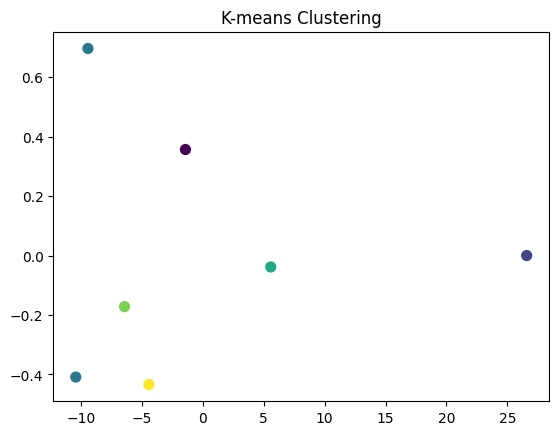

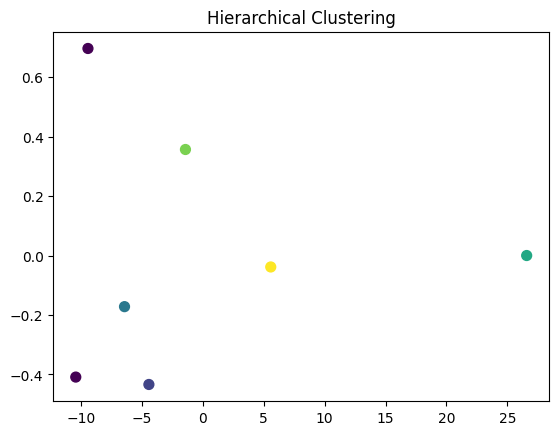

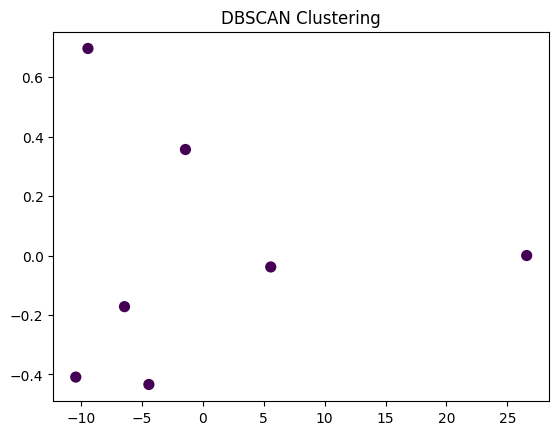

K-means Scores: Silhouette=0.15278839166700622, Davies-Bouldin=0.133508382619834, Calinski-Harabasz=133.62857142857143
Hierarchical Scores: Silhouette=0.15278839166700622, Davies-Bouldin=0.133508382619834, Calinski-Harabasz=133.62857142857143
DBSCAN Scores: Silhouette=-1, Davies-Bouldin=-1, Calinski-Harabasz=-1


In [2]:


data = {
    'Class_Number': [1, 2, 3, 4, 5, 6, 7],
    'Number_Of_Animal_Species_In_Class': [41, 20, 5, 13, 4, 8, 10],
    'Class_Type': ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate'],
    'Animal_Names': [
        'aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf',
        'chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren',
        'pitviper, seasnake, slowworm, tortoise, tuatara',
        'bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna',
        'frog, frog, newt, toad',
        'flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp',
        'clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm'
    ]
}

df = pd.DataFrame(data)

# Encode the 'Class_Type' categorical variable
encoder = OneHotEncoder()
class_type_encoded = encoder.fit_transform(df[['Class_Type']]).toarray()

# Combine the encoded features with the other numerical features
features = pd.concat([df[['Number_Of_Animal_Species_In_Class']], pd.DataFrame(class_type_encoded)], axis=1)

# Prepare the feature matrix
X = features.values

# Apply K-means
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
kmeans_labels = kmeans.labels_

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=6).fit(X)
hierarchical_labels = hierarchical.labels_

# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=2).fit(X)
dbscan_labels = dbscan.labels_

# Define the plot_clusters function
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(title)
    plt.show()

# Since we have more than 2 dimensions, we use PCA to reduce the dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plot_clusters(X_pca, kmeans_labels, "K-means Clustering")
plot_clusters(X_pca, hierarchical_labels, "Hierarchical Clustering")
plot_clusters(X_pca, dbscan_labels, "DBSCAN Clustering")

# Define the evaluate_clustering function
def evaluate_clustering(X, labels):
    unique_labels = set(labels)
    if len(unique_labels) > 1:
        silhouette = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        return silhouette, davies_bouldin, calinski_harabasz
    else:
        return -1, -1, -1  # Return invalid scores for single cluster results

# Evaluate clustering performance
kmeans_scores = evaluate_clustering(X, kmeans_labels)
hierarchical_scores = evaluate_clustering(X, hierarchical_labels)
dbscan_scores = evaluate_clustering(X, dbscan_labels)

# Print the scores
print(f"K-means Scores: Silhouette={kmeans_scores[0]}, Davies-Bouldin={kmeans_scores[1]}, Calinski-Harabasz={kmeans_scores[2]}")
print(f"Hierarchical Scores: Silhouette={hierarchical_scores[0]}, Davies-Bouldin={hierarchical_scores[1]}, Calinski-Harabasz={hierarchical_scores[2]}")
print(f"DBSCAN Scores: Silhouette={dbscan_scores[0]}, Davies-Bouldin={dbscan_scores[1]}, Calinski-Harabasz={dbscan_scores[2]}")

In [ ]:
                                                                    #Conclusione del Progetto

In [ ]:
#Basandoci sui punteggi sembra che K-Means & Hierarchical clustering sono  l'algoritmi che approssimanno  meglio le classi nel set di dati con un punteggio positivo di Silhouette (0.152) &
 #valori bassi sia per l'Indice di Davies-Bouldin (0.134) anche di Calinski-Harabasz (133.63).Questi risultati indicano che K-means e Hierarchical clustering hanno prodotto dei 
#cluster che sono compatti e ben separati.

In [ ]:
#DBSCAN  ha ottenuto un punteggio negativo di Silhouette e valori negativi per Davies-Bouldin e Calinski-Harabasz, 
# indicando che non è stato in grado di raggruppare i dati in cluster significativi,che non è  stato in grado di capire nessun cluster tra loro 
# o con altre parole i dati Noise(i dati non ideali).